In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("../Dataset/air_traffic_data.csv")
df

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


In [3]:
df.columns=df.columns.str.replace(' ','_',regex=True)
df.columns

Index(['Activity_Period', 'Operating_Airline', 'Operating_Airline_IATA_Code',
       'Published_Airline', 'Published_Airline_IATA_Code', 'GEO_Summary',
       'GEO_Region', 'Activity_Type_Code', 'Price_Category_Code', 'Terminal',
       'Boarding_Area', 'Passenger_Count', 'Adjusted_Activity_Type_Code',
       'Adjusted_Passenger_Count', 'Year', 'Month'],
      dtype='object')

# Data Preparation:

### How can we handling missing values and anomalies in the dataset?

In [4]:
df.isnull().sum()

Activity_Period                 0
Operating_Airline               0
Operating_Airline_IATA_Code    54
Published_Airline               0
Published_Airline_IATA_Code    54
GEO_Summary                     0
GEO_Region                      0
Activity_Type_Code              0
Price_Category_Code             0
Terminal                        0
Boarding_Area                   0
Passenger_Count                 0
Adjusted_Activity_Type_Code     0
Adjusted_Passenger_Count        0
Year                            0
Month                           0
dtype: int64

### fillna

In [5]:
df.Operating_Airline_IATA_Code=df.Operating_Airline_IATA_Code.fillna('None')
df.Published_Airline_IATA_Code=df.Published_Airline_IATA_Code.fillna('None')
df

,Activity_Period,Operating_Airline,Operating_Airline_IATA_Code,Published_Airline,Published_Airline_IATA_Code,GEO_Summary,GEO_Region,Activity_Type_Code,Price_Category_Code,Terminal,Boarding_Area,Passenger_Count,Adjusted_Activity_Type_Code,Adjusted_Passenger_Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


In [6]:
df

,Activity_Period,Operating_Airline,Operating_Airline_IATA_Code,Published_Airline,Published_Airline_IATA_Code,GEO_Summary,GEO_Region,Activity_Type_Code,Price_Category_Code,Terminal,Boarding_Area,Passenger_Count,Adjusted_Activity_Type_Code,Adjusted_Passenger_Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


In [7]:
df.isnull().sum()

Activity_Period                0
Operating_Airline              0
Operating_Airline_IATA_Code    0
Published_Airline              0
Published_Airline_IATA_Code    0
GEO_Summary                    0
GEO_Region                     0
Activity_Type_Code             0
Price_Category_Code            0
Terminal                       0
Boarding_Area                  0
Passenger_Count                0
Adjusted_Activity_Type_Code    0
Adjusted_Passenger_Count       0
Year                           0
Month                          0
dtype: int64

In [8]:
df.dtypes

Activity_Period                 int64
Operating_Airline              object
Operating_Airline_IATA_Code    object
Published_Airline              object
Published_Airline_IATA_Code    object
GEO_Summary                    object
GEO_Region                     object
Activity_Type_Code             object
Price_Category_Code            object
Terminal                       object
Boarding_Area                  object
Passenger_Count                 int64
Adjusted_Activity_Type_Code    object
Adjusted_Passenger_Count        int64
Year                            int64
Month                          object
dtype: object

In [10]:
df.Operating_Airline.unique()

array(['ATA Airlines', 'Air Canada ', 'Air China', 'Air France',
       'Air New Zealand', 'AirTran Airways', 'Alaska Airlines',
       'All Nippon Airways', 'American Airlines',
       'American Eagle Airlines', 'Asiana Airlines',
       'Atlantic Southeast Airlines', 'BelAir Airlines',
       'British Airways', 'Cathay Pacific', 'China Airlines',
       'Delta Air Lines', 'EVA Airways', 'Frontier Airlines',
       'Hawaiian Airlines', 'Horizon Air ', 'Icelandair',
       'Independence Air', 'Japan Airlines', 'KLM Royal Dutch Airlines',
       'Korean Air Lines', 'Lufthansa German Airlines', 'Mesa Airlines',
       'Mexicana Airlines', 'Midwest Airlines', 'Northwest Airlines',
       'Philippine Airlines', 'Singapore Airlines', 'SkyWest Airlines',
       'Sun Country Airlines', 'TACA', 'US Airways', 'United Airlines',
       'Virgin Atlantic', 'WestJet Airlines', 'Boeing Company',
       'Miami Air International', 'Air Canada Jazz', 'Qantas Airways',
       'Ameriflight', 'Spirit Airl

In [9]:
df.Operating_Airline = df.Operating_Airline.replace('United Airlines - Pre 07/01/2013','United Airlines',regex=True)


In [12]:
df.GEO_Region.unique()

array(['US', 'Canada', 'Asia', 'Europe', 'Oceania', 'Mexico',
       'Central America', 'Middle East', 'South America'], dtype=object)

In [11]:
df.GEO_Region = df.GEO_Region.str.replace('Australia / Oceania','Oceania',regex=True)


In [13]:
df.GEO_Region.unique()

array(['US', 'Canada', 'Asia', 'Europe', 'Oceania', 'Mexico',
       'Central America', 'Middle East', 'South America'], dtype=object)

In [14]:
df.Activity_Type_Code.unique()

array(['Deplaned', 'Enplaned', 'Thru / Transit'], dtype=object)

In [15]:
df.Price_Category_Code.unique()

array(['Low Fare', 'Other'], dtype=object)

In [16]:
df.Terminal.unique()

array(['Terminal 1', 'International', 'Terminal 3', 'Other', 'Terminal 2'],
      dtype=object)

In [18]:
df.Published_Airline.unique()

array(['ATA Airlines', 'Air Canada ', 'Air China', 'Air France',
       'Air New Zealand', 'AirTran Airways', 'Alaska Airlines',
       'All Nippon Airways', 'American Airlines', 'Asiana Airlines',
       'Delta Air Lines', 'BelAir Airlines', 'British Airways',
       'Cathay Pacific', 'China Airlines', 'EVA Airways',
       'Frontier Airlines', 'Hawaiian Airlines', 'Icelandair',
       'Independence Air', 'Japan Airlines', 'KLM Royal Dutch Airlines',
       'Korean Air Lines', 'Lufthansa German Airlines', 'US Airways',
       'Mexicana Airlines', 'Midwest Airlines', 'Northwest Airlines',
       'Philippine Airlines', 'Singapore Airlines', 'United Airlines',
       'Sun Country Airlines', 'TACA', 'Virgin Atlantic',
       'WestJet Airlines', 'Boeing Company', 'Miami Air International',
       'Qantas Airways', 'Ameriflight', 'Spirit Airlines', 'Xtra Airways',
       'Evergreen International Airlines', 'Aeromexico',
       'JetBlue Airways ', 'Southwest Airlines', 'Virgin America',
    

In [17]:
df.Published_Airline = df.Published_Airline.replace('United Airlines - Pre 07/01/2013','United Airlines',regex=True)


### What transformation are required to convert rhe Activity Period column into a more usable format?

In [19]:
df.Activity_Period=pd.to_datetime(df.Activity_Period,format='%Y%m')

In [20]:
df

,Activity_Period,Operating_Airline,Operating_Airline_IATA_Code,Published_Airline,Published_Airline_IATA_Code,GEO_Summary,GEO_Region,Activity_Type_Code,Price_Category_Code,Terminal,Boarding_Area,Passenger_Count,Adjusted_Activity_Type_Code,Adjusted_Passenger_Count,Year,Month
0,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,2005-07-01,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,2005-07-01,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,2016-03-01,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,2016-03-01,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,2016-03-01,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,2016-03-01,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


# Exploratory Data Analysis(EDA)

### What are the key statistics for passenger counts,and how are they distributed?

In [21]:
df.describe()

,Passenger_Count,Adjusted_Passenger_Count,Year
count,15007.000000,15007.000000,15007.000000
mean,29240.521090,29331.917105,2010.385220
std,58319.509284,58284.182219,3.137589
min,1.000000,1.000000,2005.000000
25%,5373.500000,5495.500000,2008.000000
50%,9210.000000,9354.000000,2010.000000
75%,21158.500000,21182.000000,2013.000000
max,659837.000000,659837.000000,2016.000000


### Which regions(GEO Summary and GEO Region)have the highest and lowest passenger traffic?

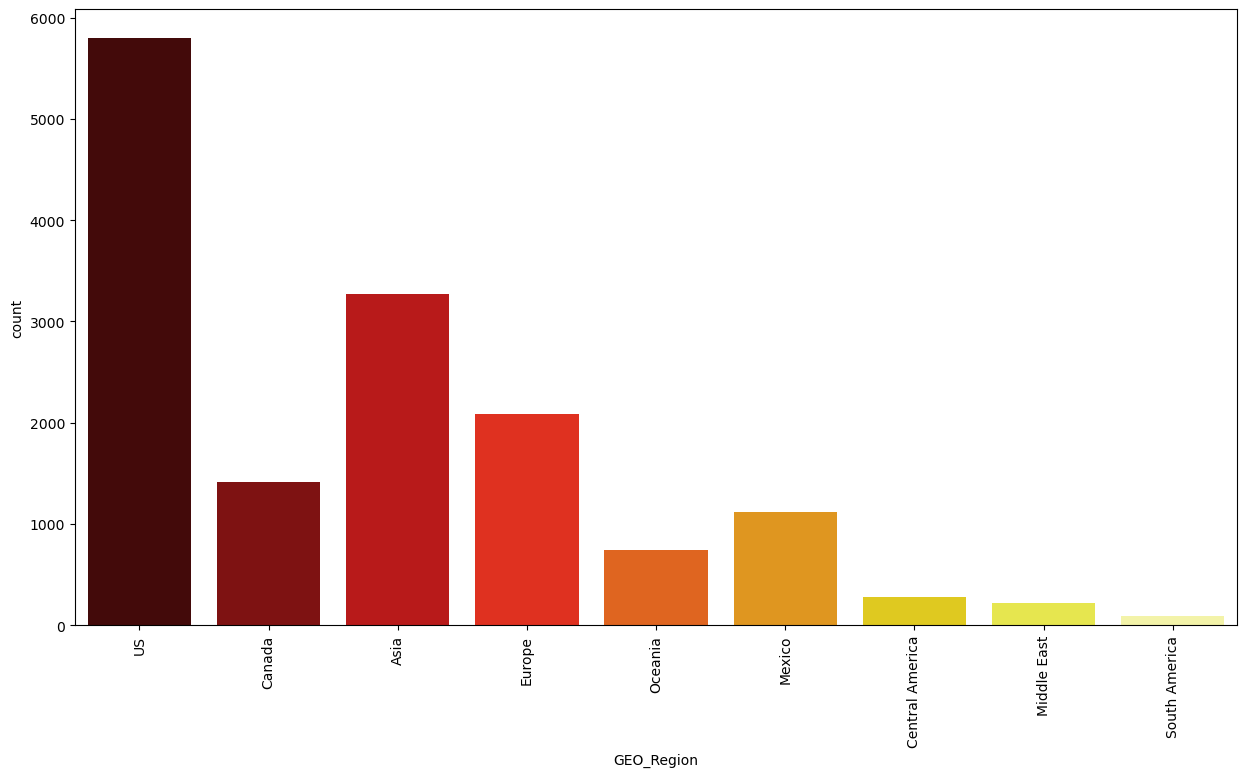

In [22]:
plt.figure(figsize=[15,8])
sb.countplot(x=df.GEO_Region,palette='hot')
plt.xticks(rotation=90)
plt.show()

# Region-wise Traffic interpretation
### The United States dominates passenger traffic,indicating a strong emphasis on domestic travel.
### Asia and Europe are the leading international regions and Canada and Mexico show solid regional connectivity.
### Under-represent region: South America,Middle East,Central America have very low passenger traffic.

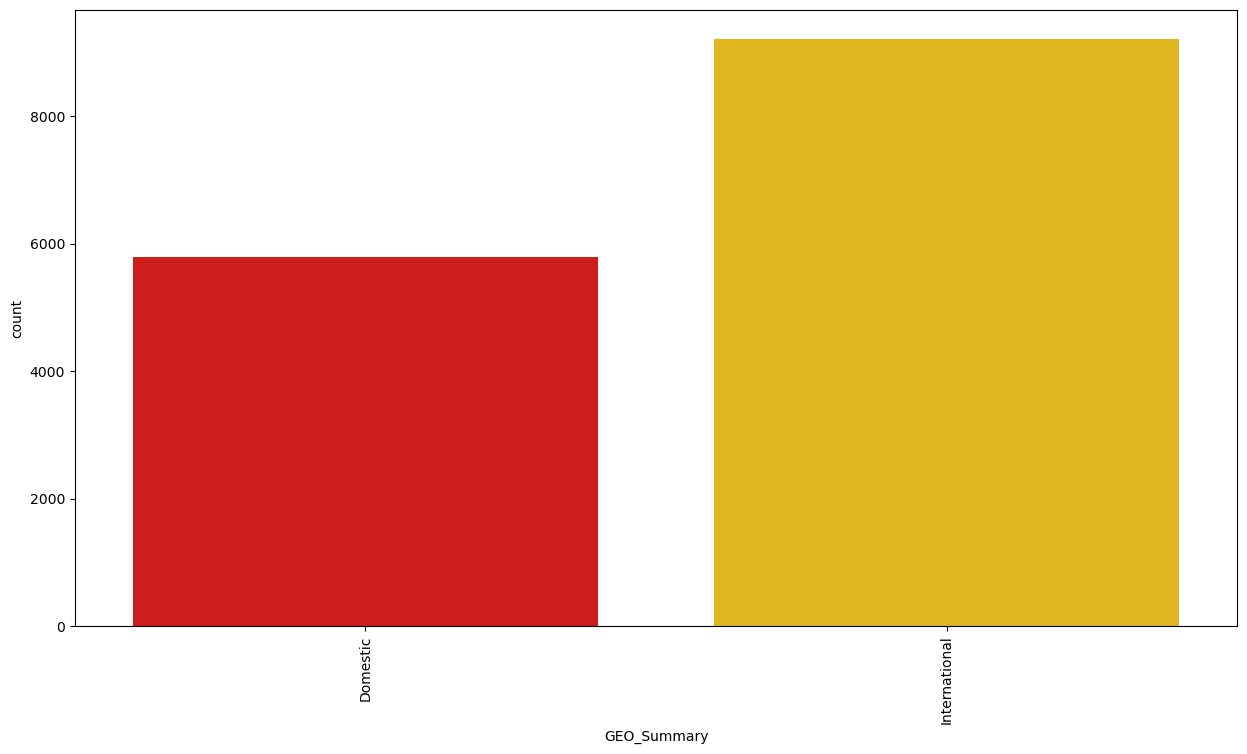

In [23]:
plt.figure(figsize=[15,8])
sb.countplot(x=df.GEO_Summary,palette='hot')
plt.xticks(rotation=90)
plt.show()

### The International passenger count is the highest,reaching appoximately(8000-8500).
### The Domestic passenger count is lowest than internationl.at appoximately(5500-6000).

In [24]:
t=df.groupby('GEO_Region')['Adjusted_Passenger_Count'].sum().nlargest(10)
t

GEO_Region
US                 339042637
Asia                44213493
Europe              26695446
Canada              13901776
Mexico               8084752
Oceania              4786892
Middle East          1852943
Central America      1355400
South America         250741
Name: Adjusted_Passenger_Count, dtype: int64

In [25]:
s=df.groupby('GEO_Region')['Adjusted_Passenger_Count'].sum().nsmallest(10)
s

GEO_Region
South America         250741
Central America      1355400
Middle East          1852943
Oceania              4786892
Mexico               8084752
Canada              13901776
Europe              26695446
Asia                44213493
US                 339042637
Name: Adjusted_Passenger_Count, dtype: int64

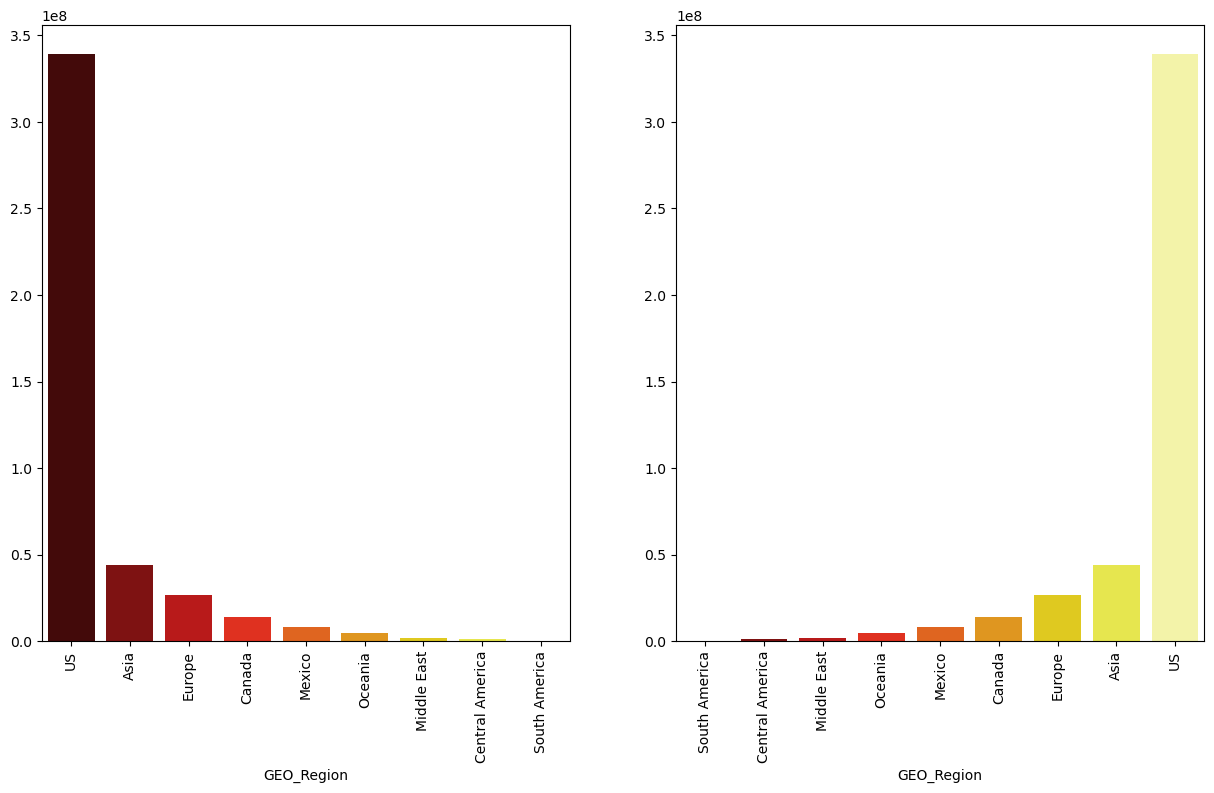

In [26]:
plt.figure(figsize=[15,8])

plt.subplot(121)
sb.barplot(x=t.index,y=t.values,palette='hot')
plt.xticks(rotation=90)

plt.subplot(122)
sb.barplot(x=s.index,y=s.values,palette='hot')
plt.xticks(rotation=90)

plt.show()

# Region-wise Min vs Max values
### The dataset is heavily dominated by the US across both maximum and minimum values.
### Asia and Europe are the next most significant cintributor but far behind the US.
### South America,Central America,Middle East and Oceania are consistently under-represented.

### How do the different activity types(Deplaned,Enplaned,etc.) contribute to passenger counts?

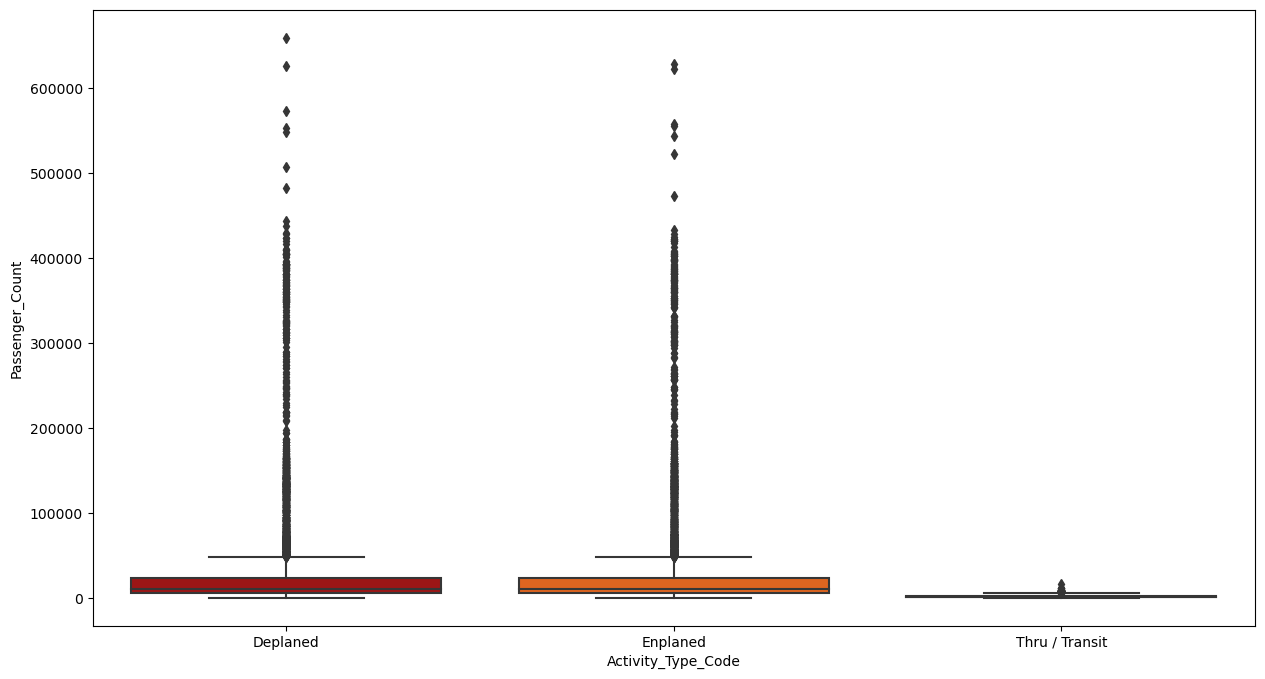

In [27]:
plt.figure(figsize=[15,8])
sb.boxplot(x=df.Activity_Type_Code,y=df.Passenger_Count,palette='hot')
plt.show()

### Enplanned(Boarding) and Deplaned(Arriving) passengers have very similar patterns and high volume ,many outliers indicating peaks travels
### Thru/Transit passenger have very low count overall

# Temporal Analysis:

In [28]:
r=df.groupby('Month')['Adjusted_Passenger_Count'].sum()
r

Month
April        33216859
August       42891174
December     36267698
February     30546207
January      33196102
July         42695678
June         37835221
March        36916971
May          35656450
November     35079712
October      38514427
September    37367581
Name: Adjusted_Passenger_Count, dtype: int64

### How has passenger traffic evolved over the year and months?

In [29]:
q=pd.pivot_table(df,index='Year',columns='Month',values='Passenger_Count',aggfunc='sum')
q

Month,April,August,December,February,January,July,June,March,May,November,October,September
Year,,,,,,,,,,,,
2005,NaN,3195866.0,2671797.0,NaN,NaN,3225769.0,NaN,NaN,NaN,2617333.0,2770715.0,2740553.0
2006,2773293.0,3143839.0,2698200.0,2223024.0,2448889.0,3227605.0,3071396.0,2708778.0,2829000.0,2653887.0,2834959.0,2720100.0
2007,2869247.0,3436417.0,2903637.0,2304990.0,2507430.0,3382382.0,3263621.0,2820085.0,3056934.0,2922500.0,3129309.0,2957530.0
2008,3029021.0,3612297.0,2962937.0,2595676.0,2670053.0,3603946.0,3453751.0,3127387.0,3305954.0,2744485.0,3124451.0,3004720.0
2009,3024973.0,3650668.0,3074209.0,2359800.0,2644539.0,3649702.0,3419595.0,2925918.0,3177100.0,2971484.0,3249428.0,3191526.0
2010,3139059.0,3771842.0,3167124.0,2515361.0,2785466.0,3765824.0,3612886.0,3105958.0,3380355.0,3163659.0,3490100.0,3356365.0
2011,3200527.0,3917884.0,3441693.0,2610667.0,2883810.0,3935589.0,3766323.0,3129205.0,3547804.0,3326859.0,3602455.0,3564970.0
2012,3563007.0,4356216.0,3443039.0,2998119.0,3211600.0,4284443.0,4107195.0,3472440.0,3820570.0,3478890.0,3844987.0,3819379.0
2013,3604104.0,4347059.0,3814984.0,2966477.0,3204637.0,4176486.0,4146797.0,3593364.0,3933016.0,3466878.0,3910790.0,3781168.0


### Are there specific monthd or seasons that show peak or low passenger traffic?

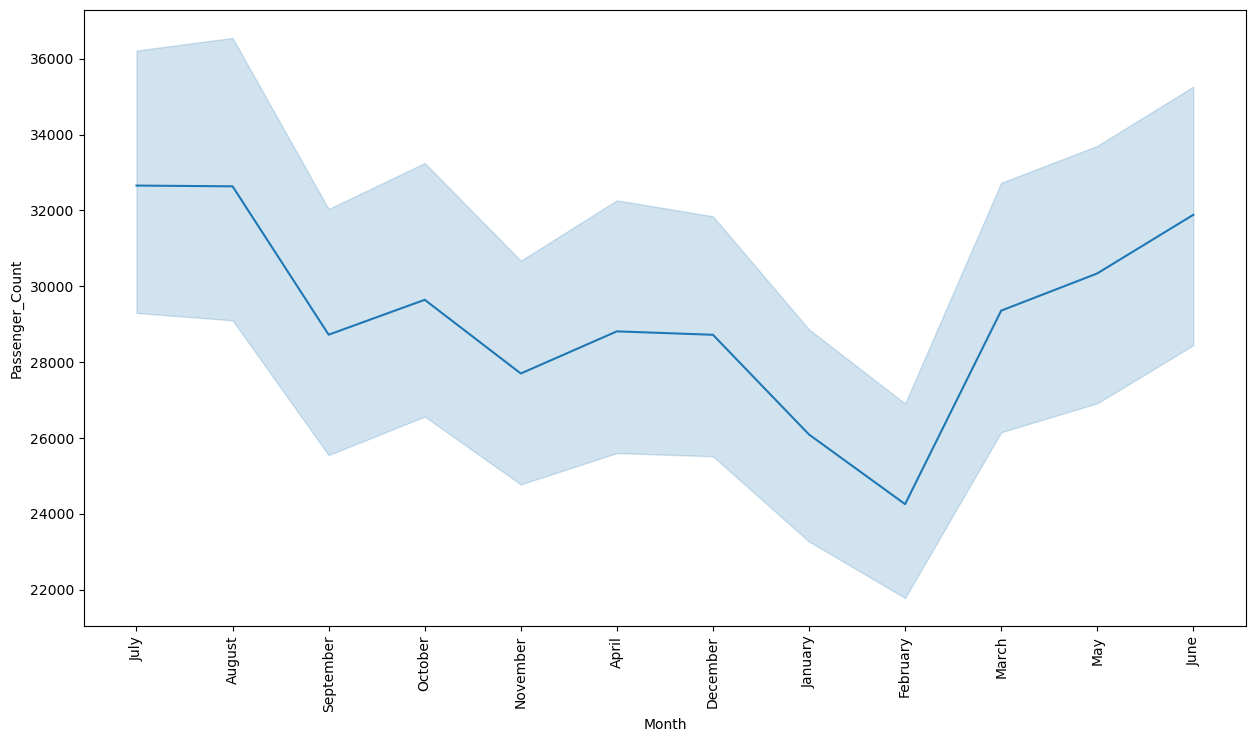

In [30]:
plt.figure(figsize=[15,8])
sb.lineplot(x=df.Month,y=df.Passenger_Count)
plt.xticks(rotation=90)
plt.show()

# Monthly Traffic(Passeenger travel)
### Highest passenger teaffic occurs in July,June and August, indicating peak travel season.
### Lowest traffic is seen in February,making it the least busy month.
### From March onward,passenger travel increase steadily until June.
### Passenger count decrease from September to November.

### What trend can be identified from year-over-year passenger data?

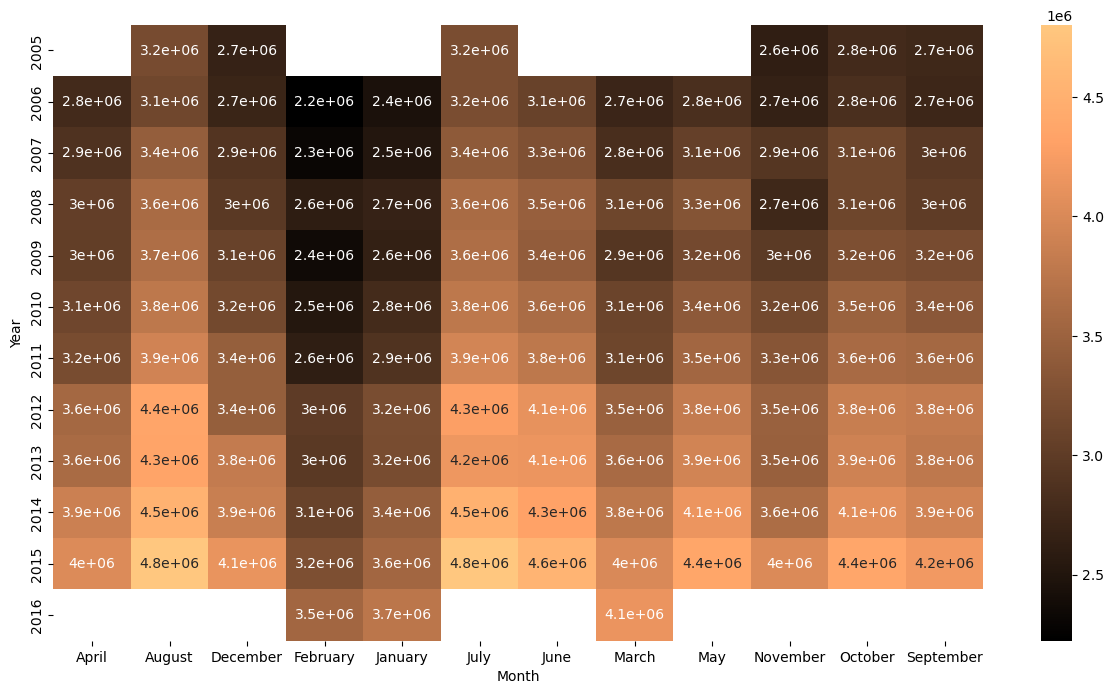

In [31]:
plt.figure(figsize=[15,8])
sb.heatmap(q,annot=True,cmap='copper')
plt.show()

# Year-wise Passenger Distribution
### 2005:Low passenger;Amercian highest,Xtra lowest.
### 2006:Slight growth;pattern unchanged.
### 2007:Moderate increase;America leads.
### 2008:Stable traffic;same ranking.
### 2009:Slight drop;rankings unchanged.
### 2010:Recovery begins;American highest.
### 2011:Steady growth continues.
### 2012:Improved passenger flow.
### 2013:Strong growth year.
### 2014:High passenger volumes.
### 2015:Consistently high traffic.
### 2016:Peak passenger levels.

# Airline Analysis:

### Which airline handle the highest and lowest number of passenger.

In [32]:
df.groupby('Operating_Airline')['Passenger_Count'].sum().nlargest()

Operating_Airline
United Airlines      170240913
SkyWest Airlines      35711737
American Airlines     34588714
Virgin America        26934738
Delta Air Lines       26440420
Name: Passenger_Count, dtype: int64

In [33]:
df.groupby('Operating_Airline')['Passenger_Count'].sum().nsmallest()

Operating_Airline
Evergreen International Airlines      4
Boeing Company                       18
Atlas Air, Inc                       68
Ameriflight                         110
Xtra Airways                        146
Name: Passenger_Count, dtype: int64

### How is passenger traffic distributed among different airline?

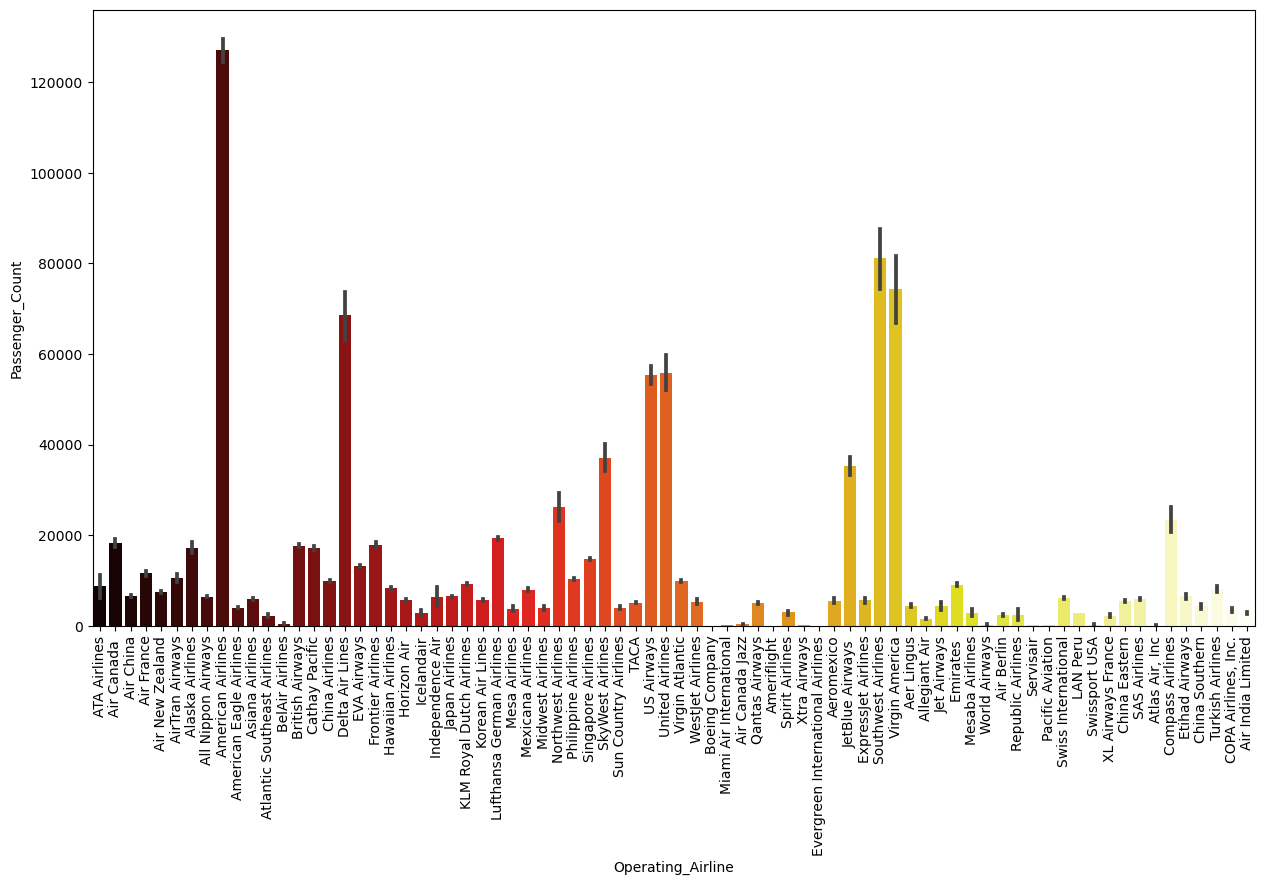

In [34]:
plt.figure(figsize=[15,8])
sb.barplot(x=df.Operating_Airline,y=df.Passenger_Count,palette='hot')
plt.xticks(rotation=90)
plt.show()

# Average Passenger count by Airline
### American Airlines has the highest Passenger count and Xtra Airlines has the lowest Operating Airline.
### United Airline,America Airline,and Southwest Airline have the highest average passenger count.
### Airline like Delta Air Lines and SkyWest Airline also see slightly passenger volumes.
### Airline like Evergreen, Boring Company and Amerifight,have very low average passenger count.

# Teminal and Boarding Area Analysis:

### Which terminal and boarding areas are the buiest in trems of passenger traffic?

In [35]:
a=df.groupby(['Terminal','Boarding_Area'])['Passenger_Count'].sum().sort_values().reset_index()
a

,Terminal,Boarding_Area,Passenger_Count
0,Other,Other,200
1,Terminal 1,A,409316
2,Terminal 2,D,34060240
3,Terminal 3,E,40886909
4,Terminal 1,C,42271640
5,International,G,57613844
6,International,A,57670570
7,Terminal 1,B,67373108
8,Terminal 3,F,138526673


### Is there a notable difference in usage between terminal or boarding area?

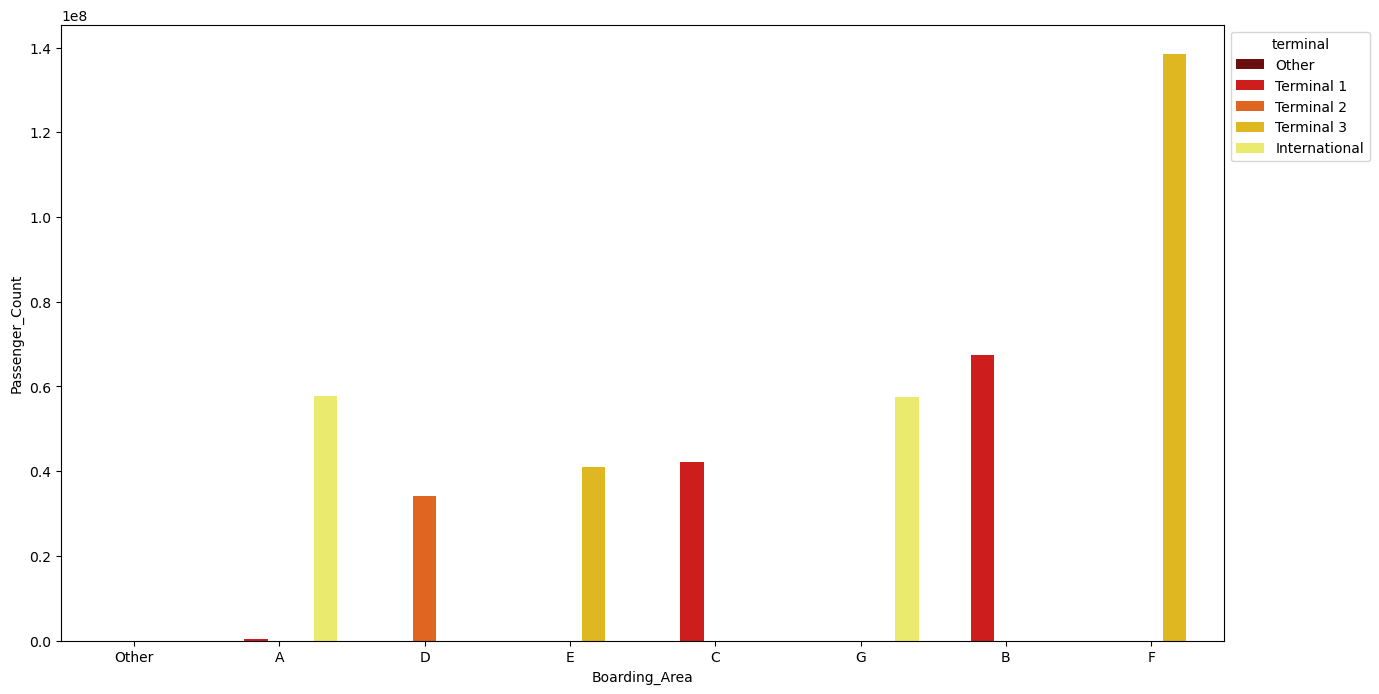

In [36]:
plt.figure(figsize=[15,8])
sb.barplot(x=a.Boarding_Area,y=a.Passenger_Count,hue=a.Terminal,palette='hot')
plt.legend(title='terminal',bbox_to_anchor=(1.0,1.0))
plt.show()

# Teminal-wise and Borading Area
### Most passenger traveled through Teminal3 and Area F making it the buiest spot.
### Internation terminal Areas A and G experienced heavy passenger traffic,and arriving from other countries.
### Terminals 1 and 2 were busy with domestic fights and Other areas had few passengers.